## Imports

In [28]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.metrics import confusion_matrix


In [5]:
X,y = make_classification(n_features=4)
from sklearn.model_selection import train_test_split  
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

## Logistic Regression

In [26]:
class LogisticRegression:

    def __init__(self, learning_rate = 0.001, n_iters = 1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None 
        self.bias = None
        self.losses = []

    # compute sigmoid
    def _sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def compute_loss(self, y_true, y_pred):
        # binary cross entropy
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)

    def feed_forward(self, X):
        z = np.dot(X, self.weights) + self.bias # recreate y = mx + c using dot product between x and weights + bias
        A = self._sigmoid(z) # normalising z using sigmoid function
        return A

    def fit(self, X, y):
        
        # initialise number of samples and number of features
        n_samples, n_features = X.shape

        # initialise weighs and biases
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for i in range(self.n_iters):
            A = self.feed_forward(X)
            self.losses.append(self.compute_loss(y, A))

            # derivatives
            dz = A - y
            dw = (1/n_samples) * np.dot(X.T, dz)
            db = (1/n_samples) * np.sum(dz)

            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
    
    def predict(self, X):
        threshold = 0.5
        y_hat = np.dot(X, self.weights) + self.bias 
        y_predicted = self._sigmoid(y_hat)
        y_predicted_cls = [1 if i > threshold else 0 for i in y_predicted]

        return np.array(y_predicted_cls)

In [23]:
## Testing

dataset = datasets.load_breast_cancer()
X, y = dataset.data, dataset.target

X, y = dataset.data, dataset.target 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1234
)

In [34]:
regressor = LogisticRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)
cm, accuracy = confusion_matrix(np.asarray(y_test), np.asarray(predictions))
print(f"Test accuracy: {accuracy}")
print("Confusion Matrix:",np.array(cm))

Test accuracy: [ 9 60]
Confusion Matrix: [42  3]


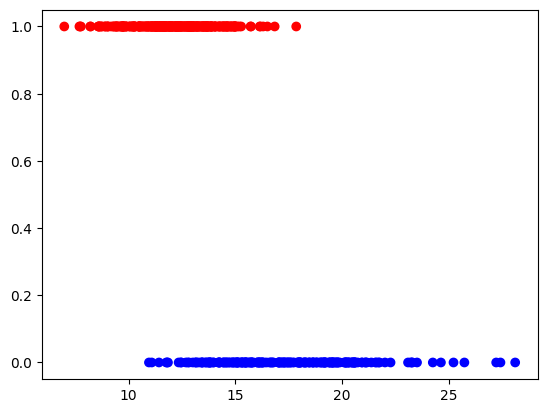

In [56]:
plt.figure()
col = np.where(dataset.data[:,0]<1,'k',np.where(y<0.5,'b','r'))
plt.scatter(X[:,0], y, c = col)
plt.show()
